In [1]:
import pandas as pd
from Functions import *

In [2]:
dfer=pd.read_excel('../data/factor_pricing_data.xlsx',sheet_name='factors (excess returns)')
dfport=pd.read_excel('../data/factor_pricing_data.xlsx',sheet_name='portfolios (excess returns)')
dfrf=pd.read_excel('../data/factor_pricing_data.xlsx',sheet_name='risk-free rate')

### 2. The Factors

#### 2.1 Analyze the factors

In [3]:
calculate_statistics(dfer)

,MKT,SMB,HML,RMW,CMA,UMD
mean,0.084562,0.011206,0.025324,0.046525,0.032492,0.060925
volatility,0.157133,0.100429,0.110056,0.083324,0.073309,0.155358
sharpe,0.538156,0.111583,0.230100,0.558358,0.443218,0.392155
skewness,-0.671645,0.313315,0.119760,-0.362418,0.300274,-1.328561
kurtosis,1.997746,4.112174,2.112075,10.807443,1.552384,9.820766
VaR,-0.075570,-0.042220,-0.042100,-0.027680,-0.027540,-0.068190
CVaR,-0.102822,-0.057663,-0.068812,-0.049689,-0.040489,-0.109270


#### 2.2 Answer the following

a) Do they all have positive risk-premiums?

Already in excess, they all have positive means.

b) How have they performed since the time of the case (2015-present)

In [4]:
calculate_statistics(dfer[dfer['Date']>'2015'])

,MKT,SMB,HML,RMW,CMA,UMD
mean,0.111705,-0.008377,-0.025817,0.048594,0.001794,0.006501
volatility,0.161913,0.097790,0.135164,0.072775,0.086542,0.143305
sharpe,0.689906,-0.085660,-0.191009,0.667732,0.020732,0.045365
skewness,-0.357150,0.107666,0.214791,0.678296,0.310721,-0.687301
kurtosis,0.716084,0.328874,1.696338,1.134531,0.981751,1.719040
VaR,-0.080850,-0.043480,-0.058610,-0.024000,-0.031950,-0.067430
CVaR,-0.097217,-0.055367,-0.084217,-0.031850,-0.049533,-0.098450


Not great. SMB and HML turned negative. RMW and UMD significantly lower returns.

#### 2.3 Report correlation matrix across the six factors

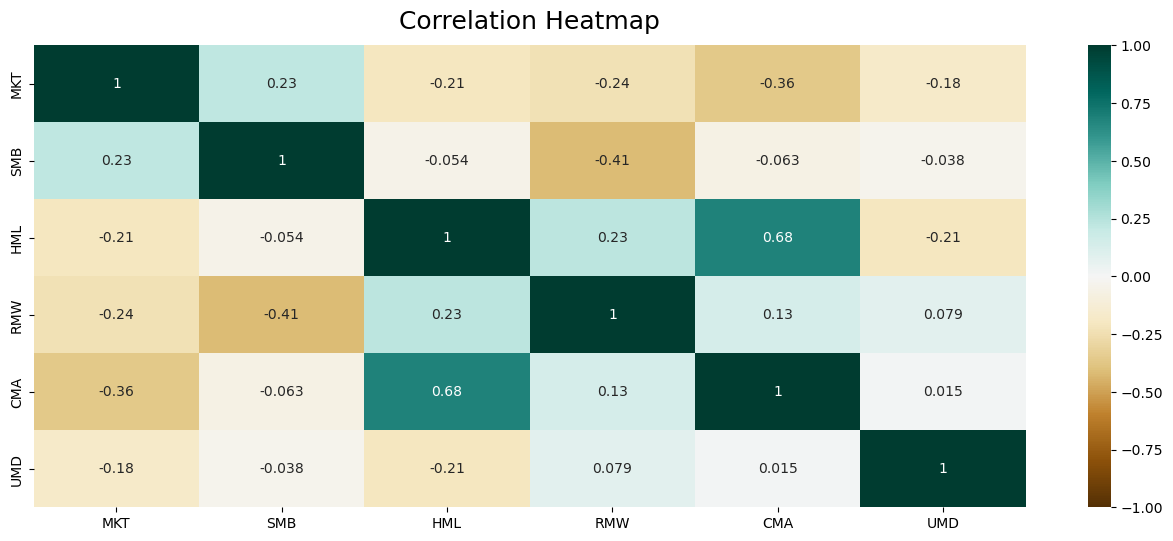

In [5]:
correlation_heatmap(dfer)

a) Does the construction method succeed in keeping correlations small?

Pretty good job overall. CMA and HML are the only ones surpassing 0.5.

b) Fama and French say that HML is somewhat redundant in their 5-factor model. Does this seem to be the case?

Definitely. The correlation with CMA seems significantly higher.

#### 2.4 Report tangency weights for a portfolio of these 6 factors

In [6]:
tangency_portfolio(dfer)

,Tangent Weights
tickers,
MKT,0.203875
SMB,0.087446
HML,-0.061776
RMW,0.307353
CMA,0.369283
UMD,0.093818


(a) Which factors seem most important? And Least?

Most: CMA, Least: HML

(b) Are the factors with low mean returns still useful?

Definitely. Remember covariance, even if low average returns.


(c) Re-do the tangency portfolio, but this time only include MKT, SMB, HML, and UMD. Which factors get high/low tangency weights now?

In [7]:
tangency_portfolio(dfer[['Date','MKT','SMB','HML','UMD']])

,Tangent Weights
tickers,
MKT,0.356440
SMB,-0.006204
HML,0.348903
UMD,0.300861


Now all but SMB are high.

What do you conclude about the importance or unimportance of these styles?

They seem important.

### 3. Testing Modent LPMs

#### 3.1. AQR 4-Factor Model

In [77]:
regAQR=run_regression(dfport,dfer[['MKT','HML','RMW','UMD']], 12)
regAQR

,alpha,beta_MKT,beta_HML,beta_RMW,beta_UMD,r2
Agric,0.009491,0.837838,0.178699,-0.006405,0.084119,0.341333
Food,0.011434,0.680903,0.169841,0.507359,0.045146,0.471088
Soda,0.019555,0.784688,0.206106,0.494736,-0.087111,0.307178
Beer,0.024178,0.723330,0.025183,0.600586,0.090319,0.426698
Smoke,0.035317,0.737220,0.249344,0.657434,-0.026824,0.272555
Toys,-0.032189,1.116824,-0.035336,0.230797,-0.150169,0.510315
Fun,0.031788,1.248868,0.000177,-0.109524,-0.230768,0.617319
Books,-0.030329,1.113566,0.265474,0.177919,-0.077390,0.689702
Hshld,-0.005510,0.752802,0.000889,0.485108,0.013206,0.560258
Clths,-0.011724,1.118614,0.049475,0.564987,-0.202276,0.631763


In [78]:
print('AQR MAE: ', round(np.mean(np.abs(regAQR.alpha)),5))

AQR MAE:  0.023


Relatively large.

#### 3.2 CAPM, FF 3-Factor, FF 5_Factor Model.

In [80]:
regCAPM=run_regression(dfport,dfer[['MKT']], 12)
print('CAPM MAE: ', round(np.mean(np.abs(regCAPM.alpha)),5))

regFF3F=run_regression(dfport,dfer[['MKT','SMB','HML']], 12)
print('FF 3-F MAE: ', round(np.mean(np.abs(regFF3F.alpha)),5))

regFF5F=run_regression(dfport,dfer[['MKT','SMB','HML','RMW','CMA']], 12)
print('FF 5-F MAE: ', round(np.mean(np.abs(regFF5F.alpha)),5))

CAPM MAE:  0.02061
FF 3-F MAE:  0.0242
FF 5-F MAE:  0.03127


#### 3.3. Any particularly important factors?

In [82]:
regAQR_mean = pd.DataFrame(regAQR.mean(), columns=['regAQR'])
regCAPM_mean = pd.DataFrame(regCAPM.mean(), columns=['regCAPM'])
regFF3F_mean = pd.DataFrame(regFF3F.mean(), columns=['regFF3F'])
regFF5F_mean = pd.DataFrame(regFF5F.mean(), columns=['regFF5F'])

tres=pd.concat([regAQR_mean, regCAPM_mean, regFF3F_mean, regFF5F_mean], axis=1)

tres.drop(['alpha'], axis=0, inplace=True)

tres

,regAQR,regCAPM,regFF3F,regFF5F
beta_MKT,1.042857,1.013924,1.016358,1.044790
beta_HML,0.134882,NaN,0.180372,0.095741
beta_RMW,0.156546,NaN,NaN,0.272760
beta_UMD,-0.060840,NaN,NaN,NaN
r2,0.577081,0.528087,0.572516,0.597519
beta_SMB,NaN,NaN,0.167483,0.251245
beta_CMA,NaN,NaN,NaN,0.109949


Momentum doesn't seem to help that much.

#### 3.4. Good as an LFDs? 

$R^2$ values are relatively low. Not good as a LFDs.

#### 3.5. Cross-sectional test

In [99]:
temp_df=pd.DataFrame()
names=['regAQR', 'regCAPM', 'regFF3F', 'regFF5F']
for name, i in enumerate([regAQR, regCAPM, regFF3F, regFF5F]):
    model=LinearRegression()
    model.fit(i.iloc[:,1:-1], dfport.iloc[:,1:].mean()*12)
    for col, ii in enumerate(model.coef_):
        temp_df.loc[i.columns[1:][col], names[name]]=ii

    y_pred = model.predict(i.iloc[:,1:-1])
    y_true = dfport.iloc[:,1:].mean()*12
    residuals = y_true - y_pred
    mae = np.mean(np.abs(residuals))
    temp_df.loc['MAE', names[name]]=mae

temp_df.fillna('')


,regAQR,regCAPM,regFF3F,regFF5F
beta_MKT,0.019933,0.005514,0.039742,0.046425
beta_HML,-0.033227,,-0.020863,-0.0285
beta_RMW,0.023276,,,0.025863
beta_UMD,0.002402,,,
MAE,0.013738,0.015638,0.012258,0.011547
beta_SMB,,,-0.043388,-0.046688
beta_CMA,,,,-0.02394


Very Different, am I doing something wrong?

MAE are a lot smaller!!